In [1]:
import partial_fourier_recon
import scipy.io
ksp = scipy.io.loadmat(r'D:\我的坚果云\code\utility\ksp0201_X160Y256Passes1.mat')['ksp']

In [2]:
ksp.shape # kx, ky, coil, slice

(160, 256, 16, 48)

In [3]:
kspFull_kxkycz, kspZpad_kxkycz = partial_fourier_recon.pf_recon_pocs_ms2d(ksp, 10, slice_coil_axes=(-1, -2));

auto detect peak at 26; full Nx is 268


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:28<00:00,  1.85s/it]


In [8]:
import mrfft
import matplotlib.pyplot as plt
import numpy as np

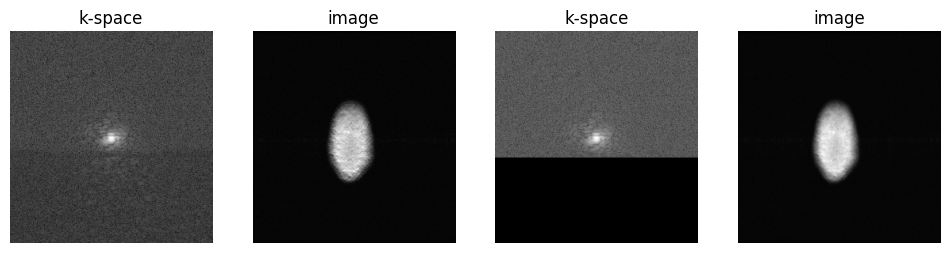

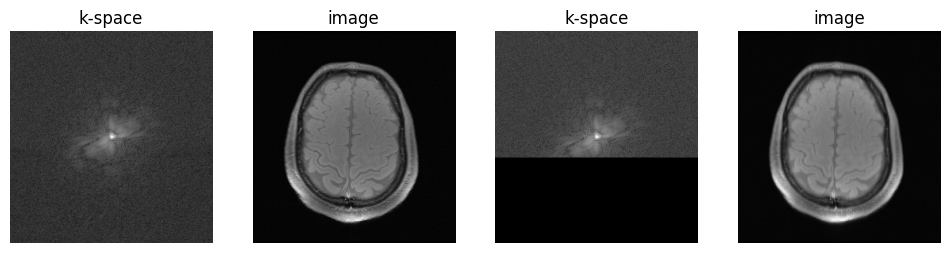

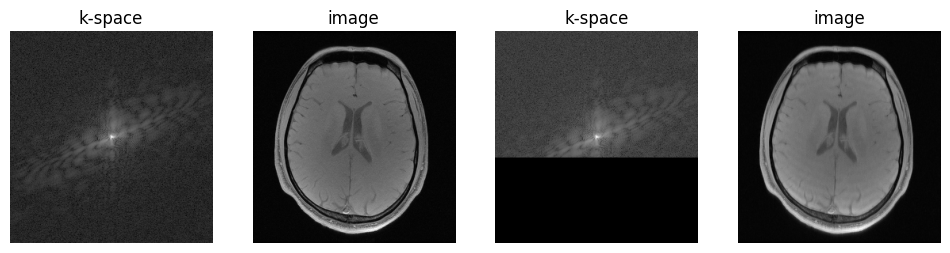

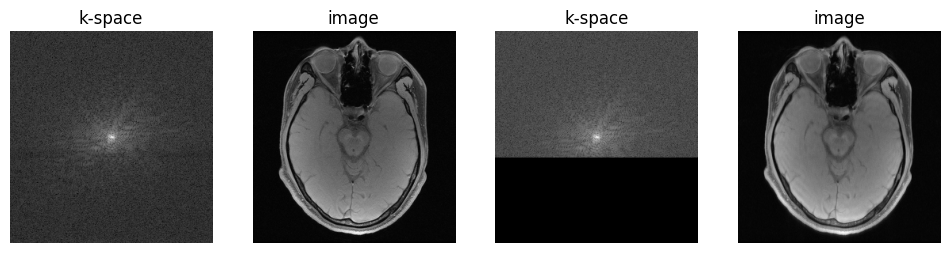

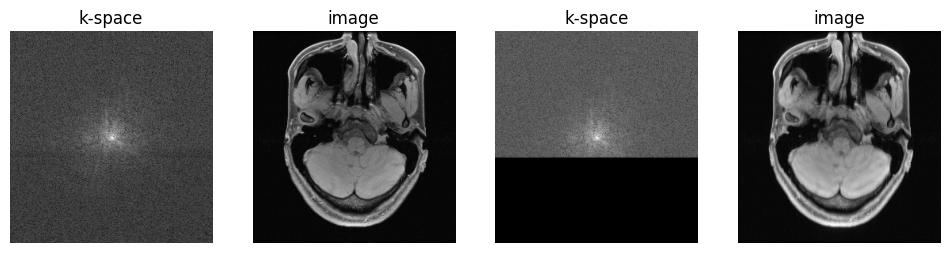

In [13]:
for iSlice in range(0, ksp.shape[-1], 10):
    data = kspFull_kxkycz[:,:,:,iSlice]
    plt.figure(figsize=[12,8])
    plt.subplot(141)
    plt.title('k-space')
    plt.imshow(abs(data[:,:,0])**0.2, cmap='gray', origin='lower')
    plt.axis('off')

    image = mrfft.ifft2c(data, [0,1])
    image = mrfft.rsos(image, 2)
    plt.subplot(142)
    plt.title('image')
    # normally you do not need to fftshift again, but have to do for this dataset
    disp_func = lambda x: np.flip(np.fft.fftshift(x,1), axis=0)
    plt.imshow(disp_func(abs(image)), cmap='gray', origin='lower')
    plt.axis('off')

    data2 = kspZpad_kxkycz[:,:,:,iSlice]
    plt.subplot(143)
    plt.title('k-space')
    plt.imshow(abs(data2[:,:,0])**0.2, cmap='gray', origin='lower')
    plt.axis('off')
    
    image2 = mrfft.ifft2c(kspZpad_kxkycz[:,:,:,iSlice], [0,1])
    image2 = mrfft.rsos(image2, 2)
    plt.subplot(144)
    plt.title('image')
    # normally you do not need to fftshift again, but have to do for this dataset
    plt.imshow(disp_func(abs(image2)), cmap='gray', origin='lower')
    plt.axis('off')
    plt.show()